In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('C:\\Users\\Admin\\ML Projects\\Projects\\Quirk Car Prices\\quikr.csv')
df.head(2)

,name,company,year,price,kms_covered,fuel_type
0,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
1,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol


In [3]:
df.shape

(891, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         891 non-null    object
 1   company      891 non-null    object
 2   year         891 non-null    object
 3   price        891 non-null    object
 4   kms_covered  839 non-null    object
 5   fuel_type    836 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## Steps to Take
- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

In [5]:
# Creating backup copy
backup = df.copy()

## Cleaning Data

#### 'year' column

In [6]:
df.year.unique()

array(['2006', '2018', '2014', '2015', '2012', '2013', '2016', '2010',
       '2007', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [7]:
df.year.str.isnumeric() # to print only numerical values

0       True
1       True
2       True
3       True
4       True
       ...  
886    False
887     True
888     True
889     True
890     True
Name: year, Length: 891, dtype: bool

In [8]:
df[df.year.str.isnumeric()]

,name,company,year,price,kms_covered,fuel_type
0,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
1,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
...,...,...,...,...,...,...
885,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
887,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
888,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
889,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [9]:
df = df[df.year.str.isnumeric()] # storing only numeric data in year column
df.shape

(841, 6)

In [10]:
# now convert object data type into integer data type
df.year.dtype 

dtype('O')

In [11]:
df['year'] = df.year.astype(int)

In [12]:
df.year.dtype

dtype('int32')

In [13]:
df['year'].head(10)

0    2006
1    2018
2    2014
3    2014
4    2015
5    2012
6    2013
7    2016
8    2015
9    2010
Name: year, dtype: int32

#### 'price' column

In [14]:
df.head(2)

,name,company,year,price,kms_covered,fuel_type
0,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
1,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol


In [15]:
df.price.unique()

array(['4,25,000', 'Ask For Price', '3,25,000', '5,75,000', '1,75,000',
       '1,90,000', '8,30,000', '2,50,000', '1,82,000', '3,15,000',
       '4,15,000', '3,20,000', '80000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75000', '1,00,000',
       '2,90,000', '95000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,500',


In [16]:
# Removing 'Ask for price'

df[df['price']=='Ask For Price'] # dataframe which contains 'Ask For Price' in price column

,name,company,year,price,kms_covered,fuel_type
1,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
68,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
84,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
137,Maruti Suzuki Alto 800 Lxi,Maruti,2018,Ask For Price,"28,028 kms",Petrol
294,Maruti Suzuki Swift LDi,Maruti,2010,Ask For Price,"52,000 kms",Diesel
303,Tata Indica eV2 LS,Tata,2017,Ask For Price,"84,000 kms",Diesel
387,Maruti Suzuki Alto 800 Lxi,Maruti,2018,Ask For Price,"24,000 kms",Petrol
448,Maruti Suzuki Zen Estilo LXI Green CNG,Maruti,2011,Ask For Price,"16,000 kms",Petrol
502,Hyundai Xcent Base 1.1 CRDi,Hyundai,2015,Ask For Price,"1,80,000 kms",Diesel


In [17]:
df = df[df['price']!='Ask For Price'] # keeping the dataframe which has no 'Ask For price' in price column

In [18]:
df.shape

(818, 6)

In [19]:
df.price.head(10)

0     4,25,000
2     3,25,000
3     5,75,000
5     1,75,000
6     1,90,000
7     8,30,000
8     2,50,000
9     1,82,000
10    3,15,000
11    4,15,000
Name: price, dtype: object

In [20]:
# Now remove commas and convert into integer

df['price'] = df.price.str.replace(',','').astype(int)

In [21]:
df.price.head(10)

0     425000
2     325000
3     575000
5     175000
6     190000
7     830000
8     250000
9     182000
10    315000
11    415000
Name: price, dtype: int32

In [22]:
df.price.dtype

dtype('int32')

In [23]:
df.shape

(818, 6)

#### 'kms_covered' column

In [24]:
df.kms_covered.unique()

array(['40 kms', '28,000 kms', '36,000 kms', '41,000 kms', '25,000 kms',
       '24,530 kms', '60,000 kms', '30,000 kms', '32,000 kms',
       '48,660 kms', '45,000 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [25]:
# Splitting strings, removing kms and commas

df['kms_covered'] = df.kms_covered.str.split().str.get(0).str.replace(',','')

In [26]:
df['kms_covered'].head(10)

0        40
2     28000
3     36000
5     41000
6     25000
7     24530
8     60000
9     60000
10    30000
11    32000
Name: kms_covered, dtype: object

In [27]:
# Just keeping numerical values
df= df[df['kms_covered'].str.isnumeric()]

In [28]:
# Converting into integer
df['kms_covered'] = df['kms_covered'].astype(int)

In [29]:
df.kms_covered.dtype

dtype('int32')

In [30]:
df.kms_covered.head(5)

0       40
2    28000
3    36000
5    41000
6    25000
Name: kms_covered, dtype: int32

In [31]:
df.describe()

,year,price,kms_covered
count,816.000000,8.160000e+02,816.000000
mean,2012.447304,4.119566e+05,46252.247549
std,4.000266,4.750664e+05,34304.743769
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [32]:
df.shape

(816, 6)

#### 'fuel_type' column

In [33]:
df.fuel_type.unique()

array(['Diesel', 'Petrol', nan, 'LPG'], dtype=object)

In [34]:
df.isna().sum()

name           0
company        0
year           0
price          0
kms_covered    0
fuel_type      1
dtype: int64

In [35]:
df = df[~df['fuel_type'].isna()] # removing nan values from fuel type

#### 'company' column

In [36]:
df.company.unique() # Don't need to do cleaning of column 'company'

array(['Mahindra', 'Hyundai', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

#### 'name' column

In [37]:
df.name.unique()

array(['Mahindra Jeep CL550 MDI',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV',
       'Hyundai Santro Xing XO eRLX Euro III', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Maruti Suzuki Alto 800 Vxi', 'Hyundai i20 Sportz 1.2',
       'Maruti Suzuki Alto 800 Lx', 'Maruti Suzuki Vitara Brezza ZDi',
       'Maruti Suzuki Alto LX', 'Mahindra Bolero DI',
       'Maruti Suzuki Swift Dzire ZDi', 'Mahindra Scorpio S10 4WD',
       'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
     

In [38]:
df['name'] = df.name.str.split(' ').str.slice(0,3).str.join(' ') # Changing car names. Keeping only the first three words

In [39]:
df.name.head(10)

0        Mahindra Jeep CL550
2          Hyundai Grand i10
3     Ford EcoSport Titanium
5                  Ford Figo
6                Hyundai Eon
7     Ford EcoSport Ambiente
8         Maruti Suzuki Alto
9        Skoda Fabia Classic
10    Maruti Suzuki Stingray
11         Hyundai Elite i20
Name: name, dtype: object

In [40]:
df.head()

,name,company,year,price,kms_covered,fuel_type
0,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
5,Ford Figo,Ford,2012,175000,41000,Diesel
6,Hyundai Eon,Hyundai,2013,190000,25000,Petrol


In [41]:
df.describe()

,year,price,kms_covered
count,815.000000,8.150000e+02,815.000000
mean,2012.451534,4.121246e+05,46277.096933
std,4.000896,4.753339e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.925000e+05,56879.000000
max,2019.000000,8.500003e+06,400000.000000


In [42]:
## Reset Index

df = df.reset_index(drop = True)
df.head()

,name,company,year,price,kms_covered,fuel_type
0,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
1,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
2,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
3,Ford Figo,Ford,2012,175000,41000,Diesel
4,Hyundai Eon,Hyundai,2013,190000,25000,Petrol


In [43]:
df.to_csv('Cleaned_cars.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         815 non-null    object
 1   company      815 non-null    object
 2   year         815 non-null    int32 
 3   price        815 non-null    int32 
 4   kms_covered  815 non-null    int32 
 5   fuel_type    815 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


## Visualization of Data

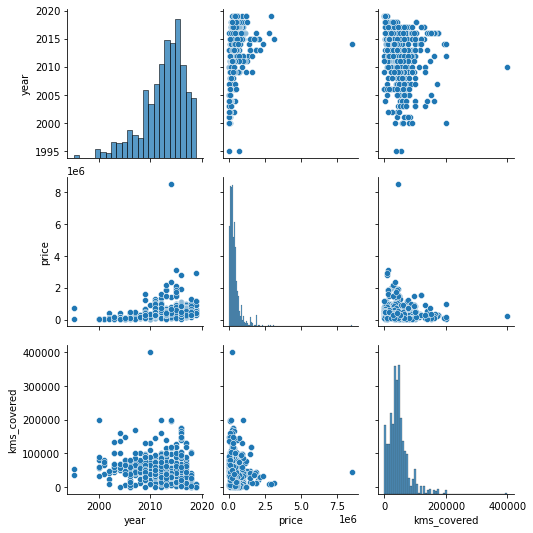

In [45]:
sns.pairplot(df)

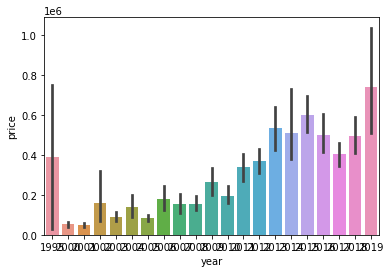

In [46]:
sns.barplot(x = 'year', y ='price', data = df)
plt.show()

In [47]:
df.columns

Index(['name', 'company', 'year', 'price', 'kms_covered', 'fuel_type'], dtype='object')

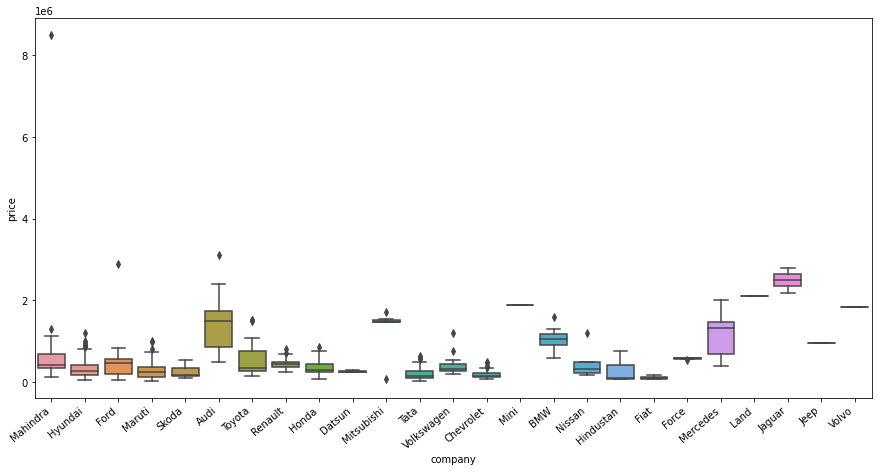

In [48]:
# Comparing relationship between company and price

plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\seaborn\categorical.py:129

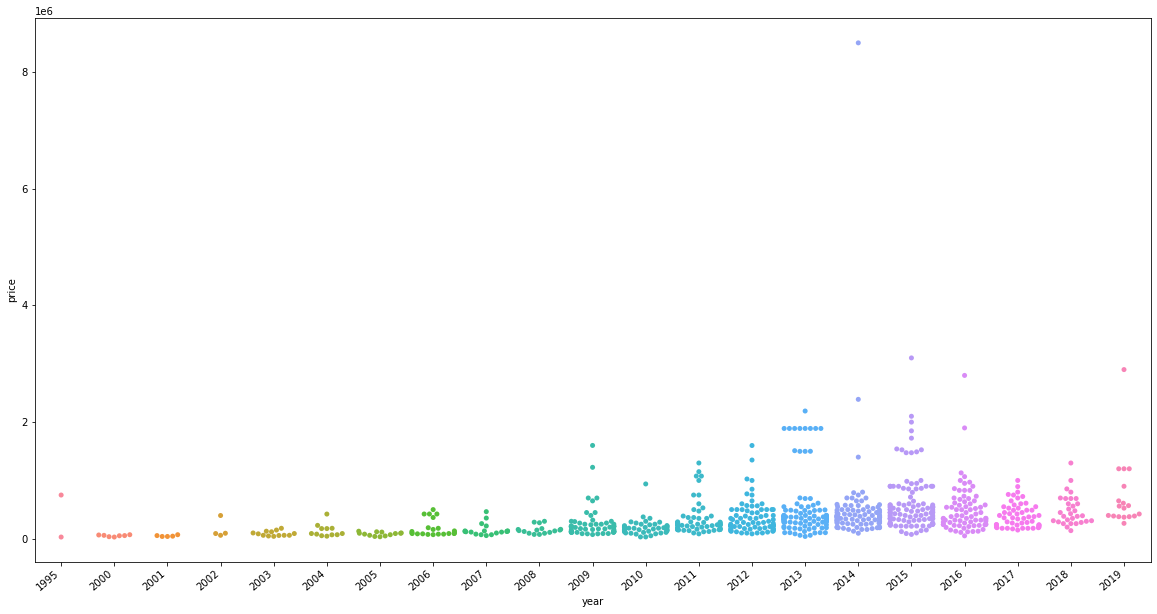

In [49]:
# Comparing relationship between year and price

plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

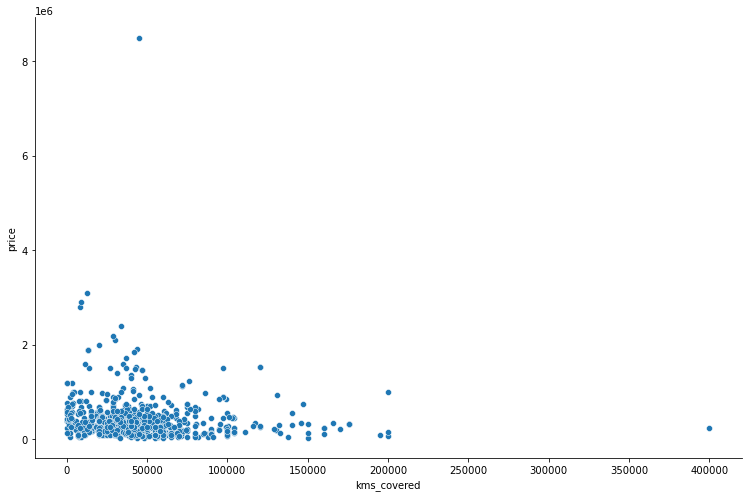

In [50]:
# Comparing relationship between kms driven and price

sns.relplot(x='kms_covered',y='price',data=df,height=7,aspect=1.5)
plt.show()

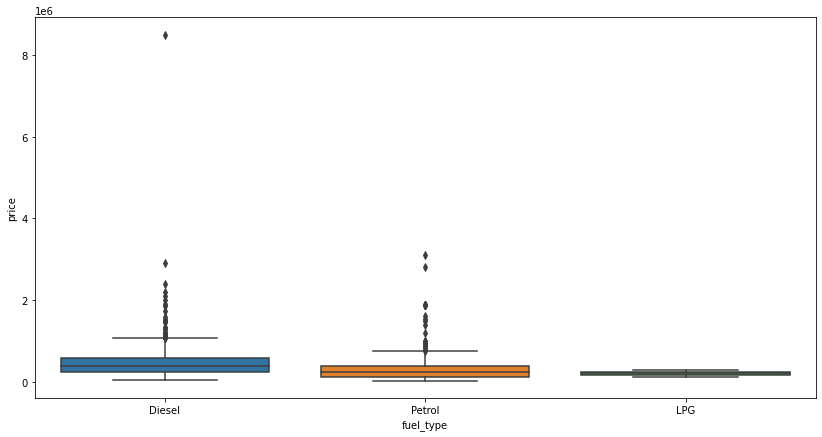

In [51]:
#Checking relationship of Fuel Type with Price

plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='price',data=df)
plt.show()

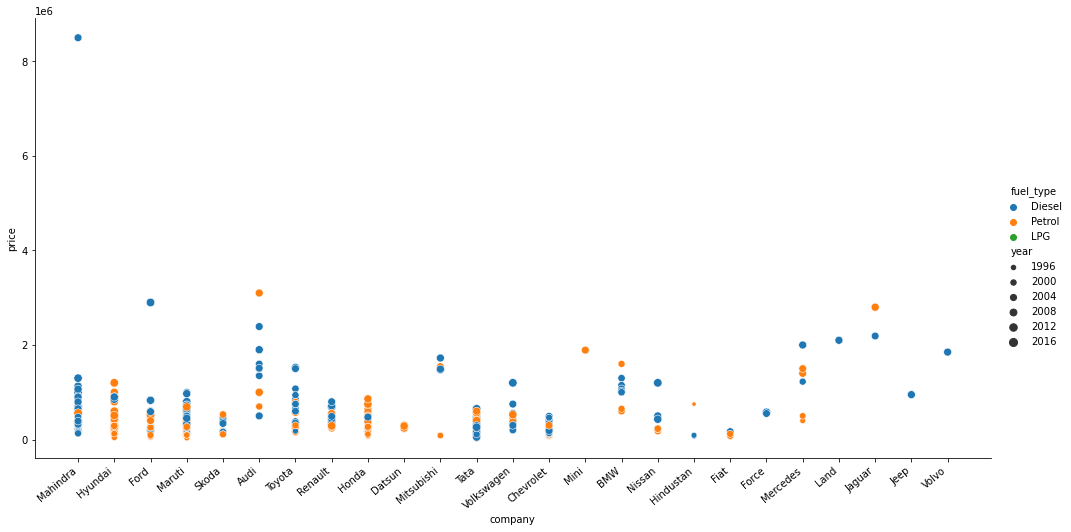

In [52]:
# Relationship of Price with FuelType, Year and Company mixed

ax=sns.relplot(x='company',y='price',data=df,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')
plt.show()

## Outliers Removal

<AxesSubplot:ylabel='Density'>

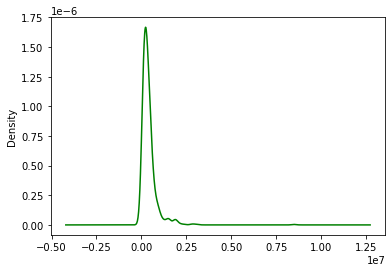

In [53]:
# 'price' column

df['price'].plot.density(color='green')

In [54]:
df = df[df['price']<6000000] # Removing outlier having price above 6000000

## Extracting Training Data

In [55]:
X=df[['name','company','year','kms_covered','fuel_type']]
y=df['price']

## Applying Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [57]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [58]:
# Creating an OneHotEncoder object

ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

## Creating a column transformer to transform categorical columns

In [59]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [60]:
# Linear Regression Model
lr=LinearRegression()

In [61]:
# Making a pipeline
pipe=make_pipeline(column_trans,lr)

In [62]:
# Fitting the model
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [63]:
y_pred=pipe.predict(X_test)

In [64]:
# Checking R2 Score

r2_score(y_test,y_pred)

0.7521116974248081

### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [65]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [66]:
np.argmax(scores)

292

In [67]:
scores[np.argmax(scores)]

0.9229158543341923

In [68]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([407557.84450234])

In [69]:
# The best model is found at a certain random state

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9229158543341923

In [70]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [71]:
scores=[]
for i in range(100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr_lasso=Lasso()
    pipe=make_pipeline(column_trans,lr_lasso)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 745137535596.1426, tolerance: 10690293761.690226
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1105845774544.9958, tolerance: 10570605292.25559
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 788041616308.1274, tolerance: 10739903384.73469
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 980421612102.106, tolerance: 10837353068.337086
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564536673672.8364, tolerance: 10609812839.021753
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 723449318205.6646, tolerance: 10274807093.251852
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 812770243652.1162, tolerance: 11341495311.601967
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 930773590430.8765, tolerance: 9568128912.412773
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1087402470754.3271, tolerance: 11096534902.23588
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1036209726318.5908, tolerance: 11274394999.173199
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 963821584083.4087, tolerance: 10692854293.32207
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 900390069596.9346, tolerance: 10599279909.611757
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear

In [72]:
# The best model is found at a certain random state

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr_lasso=Lasso()
pipe=make_pipeline(column_trans,lr_lasso)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

C:\Users\Admin\anaconda3\envs\A\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 963821584083.4087, tolerance: 10692854293.32207
  model = cd_fast.sparse_enet_coordinate_descent(


0.8718997169724529